# Import Data

In [18]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_digits
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Import Iris

In [19]:
iris = load_iris()
# type(iris)
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# iris.DESCR


In [20]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["class"]) # 0 - Setosa, 1 - versicolor, 2 - virginica

X.head()
y.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,class
0,0
1,0
2,0
3,0
4,0


## Split Dataset 

In [21]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

# Test size: %30 - compute train test split on "scaled" data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105, 1) (45, 1)


In [22]:
# Display the test data
display(X_test.head())

# Display the shape of the variable y_test, which contains the labels of test data
display(y_test.shape)

# Display the labels of test data
display(y_test.head())

print(f"The type of the y_test: {type(y_test)}")
print(f"The type of the X_test: {type(X_test)}")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


(45, 1)

,class
14,0
98,1
75,1
16,0
131,2


The type of the y_test: <class 'pandas.core.frame.DataFrame'>
The type of the X_test: <class 'pandas.core.frame.DataFrame'>


## Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=5) 

# Train the model, using the "train" data labels
model.fit(X_train, y_train)

# Predict labels using "test" data
y_test_predicted = model.predict(X_test)

DecisionTreeClassifier(random_state=5)

<Figure size 2000x1200 with 0 Axes>

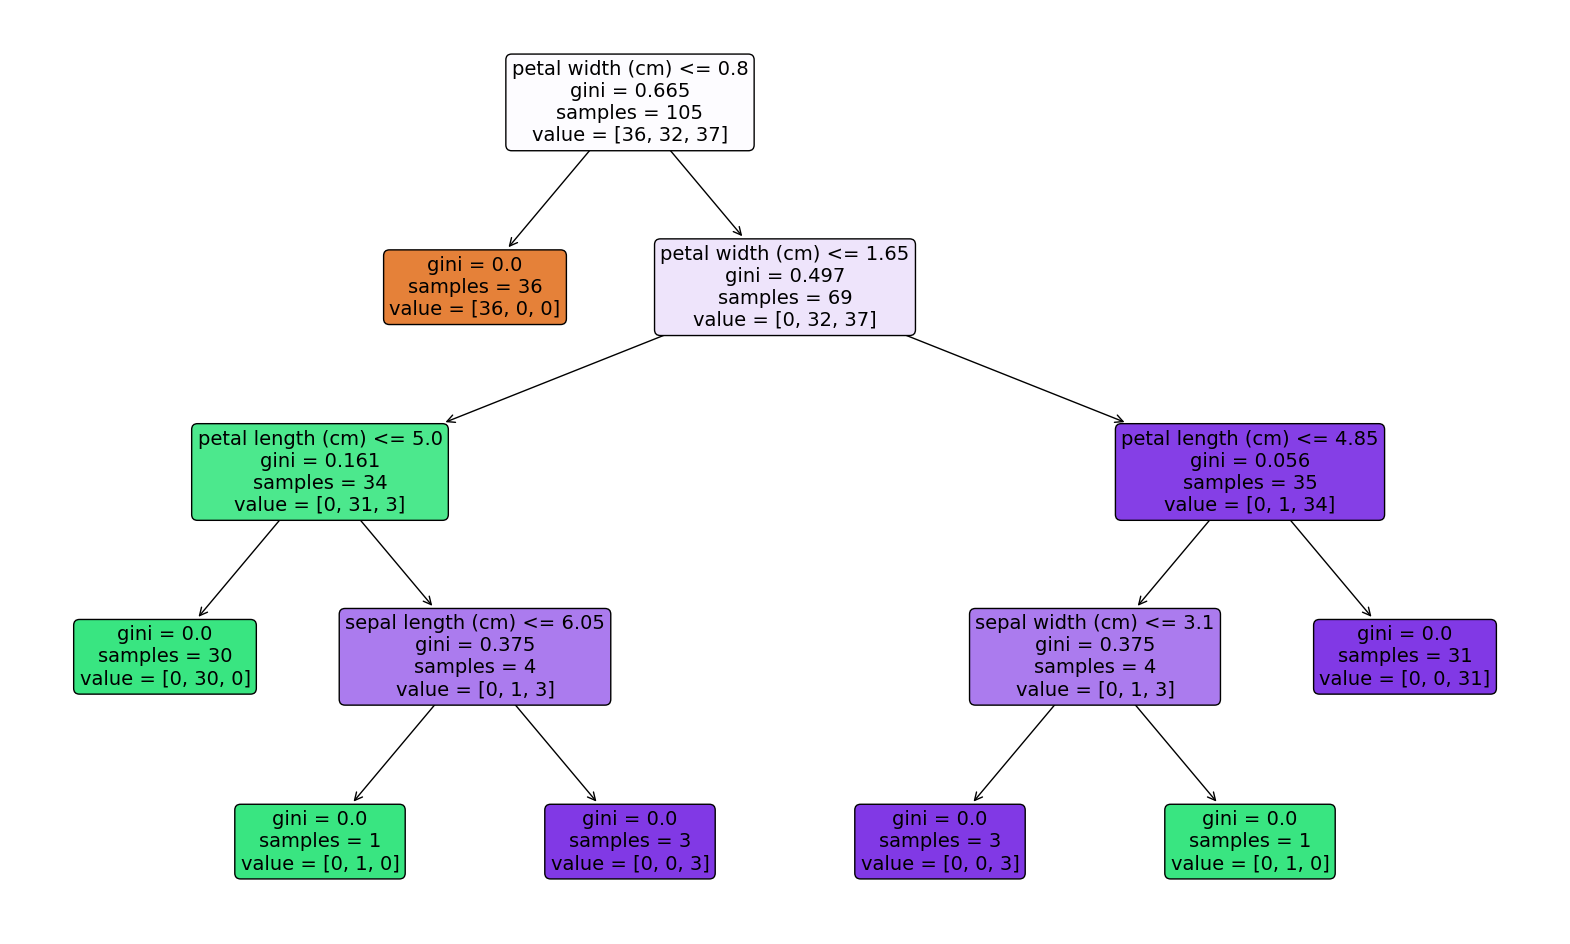

In [24]:
# Plot the results into a canvas

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,12))
modeltree = plot_tree(model,
                      feature_names=X.columns,
                      filled=True,
                      rounded=True,
                      fontsize=14
                      )

In [25]:
# Print the distinct labels (in the Iris data, there are only 3 distinct labels)
print(f"Distinct labels in the Iris dataset: {iris.target_names}\n")

print(f"Predicted labels:\t {list(y_test_predicted)}")
print(f"Actual labels:\t\t {list(y_test)}")

Distinct labels in the Iris dataset: ['setosa' 'versicolor' 'virginica']

Predicted labels:	 [0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1]
Actual labels:		 ['class']


### Model Assessment

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusionMatrix = confusion_matrix(y_test, y_test_predicted)

# Rows are the actual values, columns are predicted values
# Setosa Versicolor Virginica
# array([[14, 0,  0],
#        [ 0,  17, 1],
#        [ 0,  0, 12]])
# 1st row, 19 flowers are actually Setosa, and it is perfectly predicted as Setosa
# 2nd row, 13 flowers are correctly labeled as Versicolor out of the total 14. So, 1 of the flowers has been incorrectly classified 
# 3rd row, all 12 flowers have been correctly classified as Virginica


display(confusionMatrix)


array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

Text(0.5, 0.98, 'Confusion Matrix')

Confusion matrix:
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


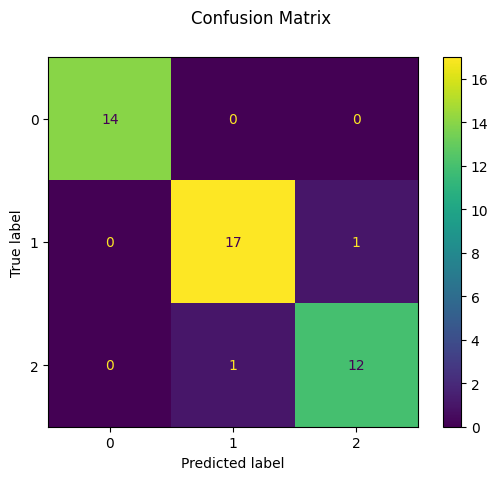

In [27]:
from sklearn import metrics
import matplotlib.pyplot as plt

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [28]:
accuracy_score(y_test, y_test_predicted)

0.9555555555555556

In [29]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

